In [1]:
import cv2
import numpy as np
from superpoint.datasets.warm_joint import WarmJoint
from utils import plot_imgs

%load_ext autoreload
%autoreload 2
%matplotlib inline

# WARM Train - Photometric and Homographic data augmentation

In [19]:
config = {
    'labels': 'outputs/magic-point_warm_joint-export',
    'truncate': 50,
    'augmentation' : {
        'photometric': {
            'enable': True,
            'primitives': [
                'random_brightness', 'random_contrast', 'additive_speckle_noise',
                'additive_gaussian_noise', 'additive_shade', 'motion_blur'],
            'params': {
                'random_brightness': {'max_abs_change': 50},
                'random_contrast': {'strength_range': [0.3, 1.5]},
                'additive_gaussian_noise': {'stddev_range': [0, 10]},
                'additive_speckle_noise': {'prob_range': [0, 0.0035]},
                'additive_shade': {'transparency_range': [-.5, .5], 'kernel_size_range': [100, 150]},
                'motion_blur': {'max_kernel_size': 3},
            }
        },
        'homographic': {
            'enable': True,
            'params': {
                'translation': True,
                'rotation': True,
                'scaling': True,
                'perspective': True,
                'scaling_amplitude': 0.2,
                'perspective_amplitude_x': 0.2,
                'perspective_amplitude_y': 0.2,
                'patch_ratio': 0.85,
                'max_angle': 3.14,
                'allow_artifacts': True,
            },
            'valid_border_margin': 3,
        }
    }
}
dataset = WarmJoint(**config)
data = dataset.get_training_set()
add_keypoints = True

In [20]:
def draw_keypoints(img, corners, color=(0, 255, 0), radius=3, s=3):
    img = np.repeat(cv2.resize(img, None, fx=s, fy=s)[..., np.newaxis], 3, -1)
    for c in np.stack(corners).T:
        cv2.circle(img, tuple(s*np.flip(c, 0)), radius, color, thickness=-1)
    return img
def draw_overlay(img, mask, color=[0, 0, 255], op=0.5, s=3):
    mask = cv2.resize(mask.astype(np.uint8), None, fx=s, fy=s, interpolation=cv2.INTER_NEAREST)
    img[np.where(mask)] = img[np.where(mask)]*(1-op) + np.array(color)*op
def display(d):
    img = draw_keypoints(d['image'][..., 0], np.where(d['keypoint_map']), (0, 255, 0)) if add_keypoints \
            else d['image'][..., 0]
    draw_overlay(img, np.logical_not(d['valid_mask']))
    return img
def display_ir(d):
    img = draw_keypoints(d['image_ir'][..., 0], np.where(d['keypoint_map']), (0, 255, 0)) if add_keypoints \
            else d['image_ir'][..., 0]
    draw_overlay(img, np.logical_not(d['valid_mask']))
    return img

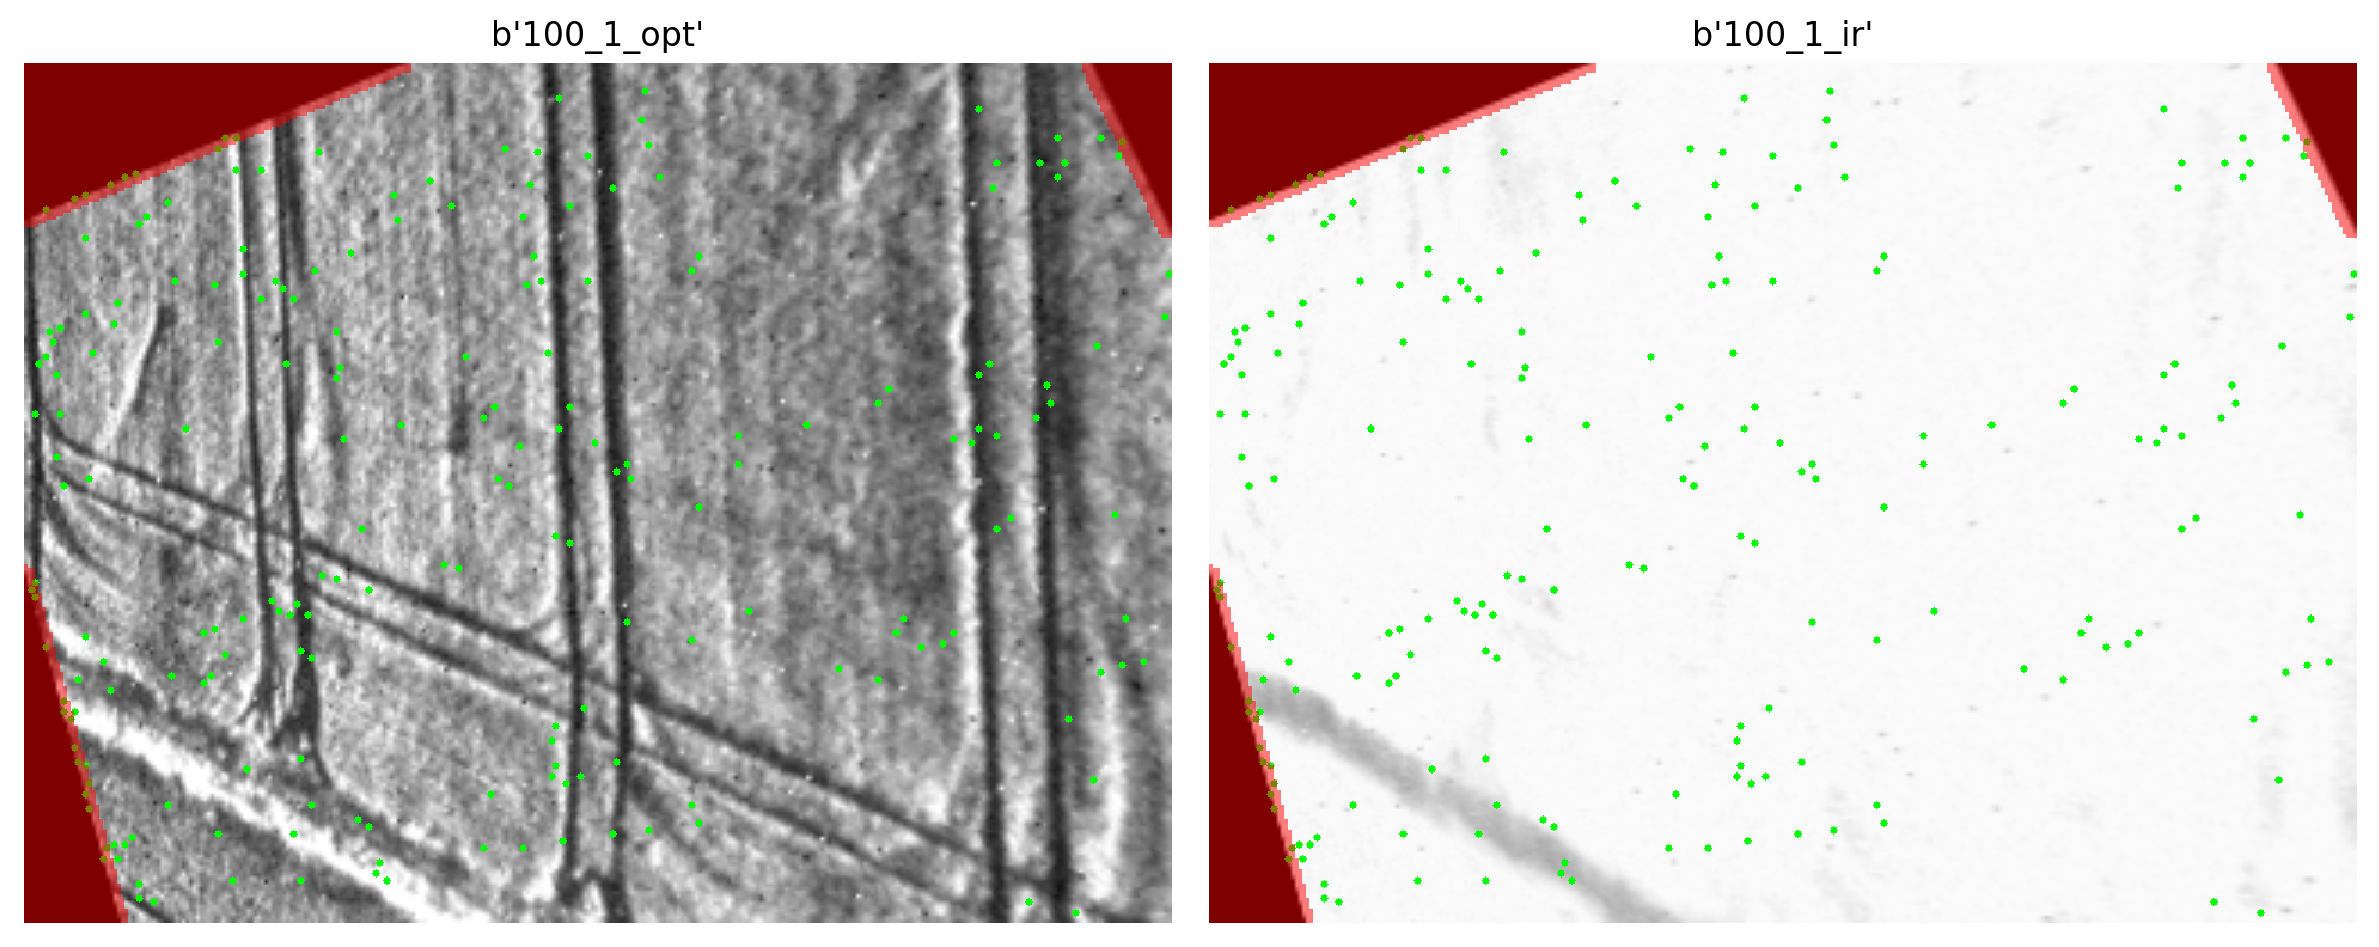

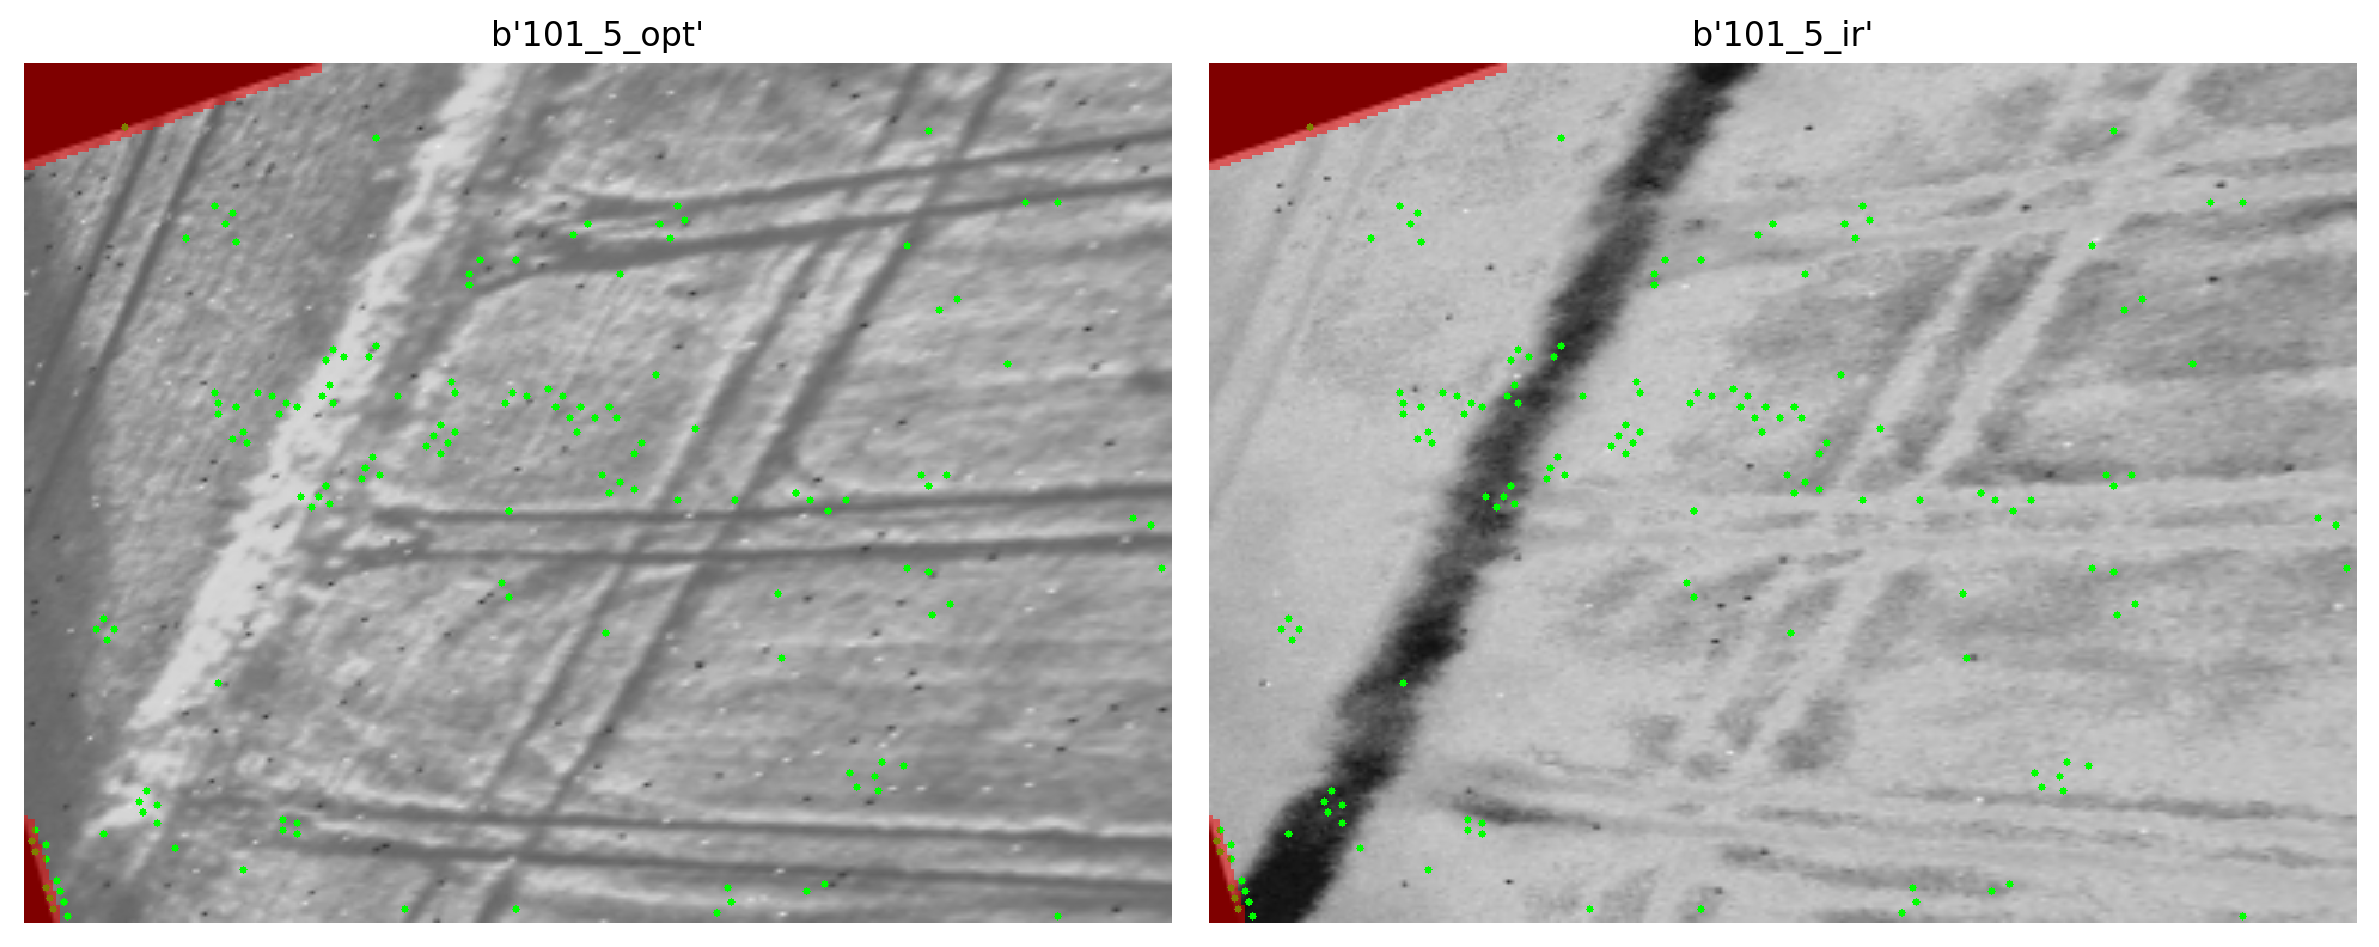

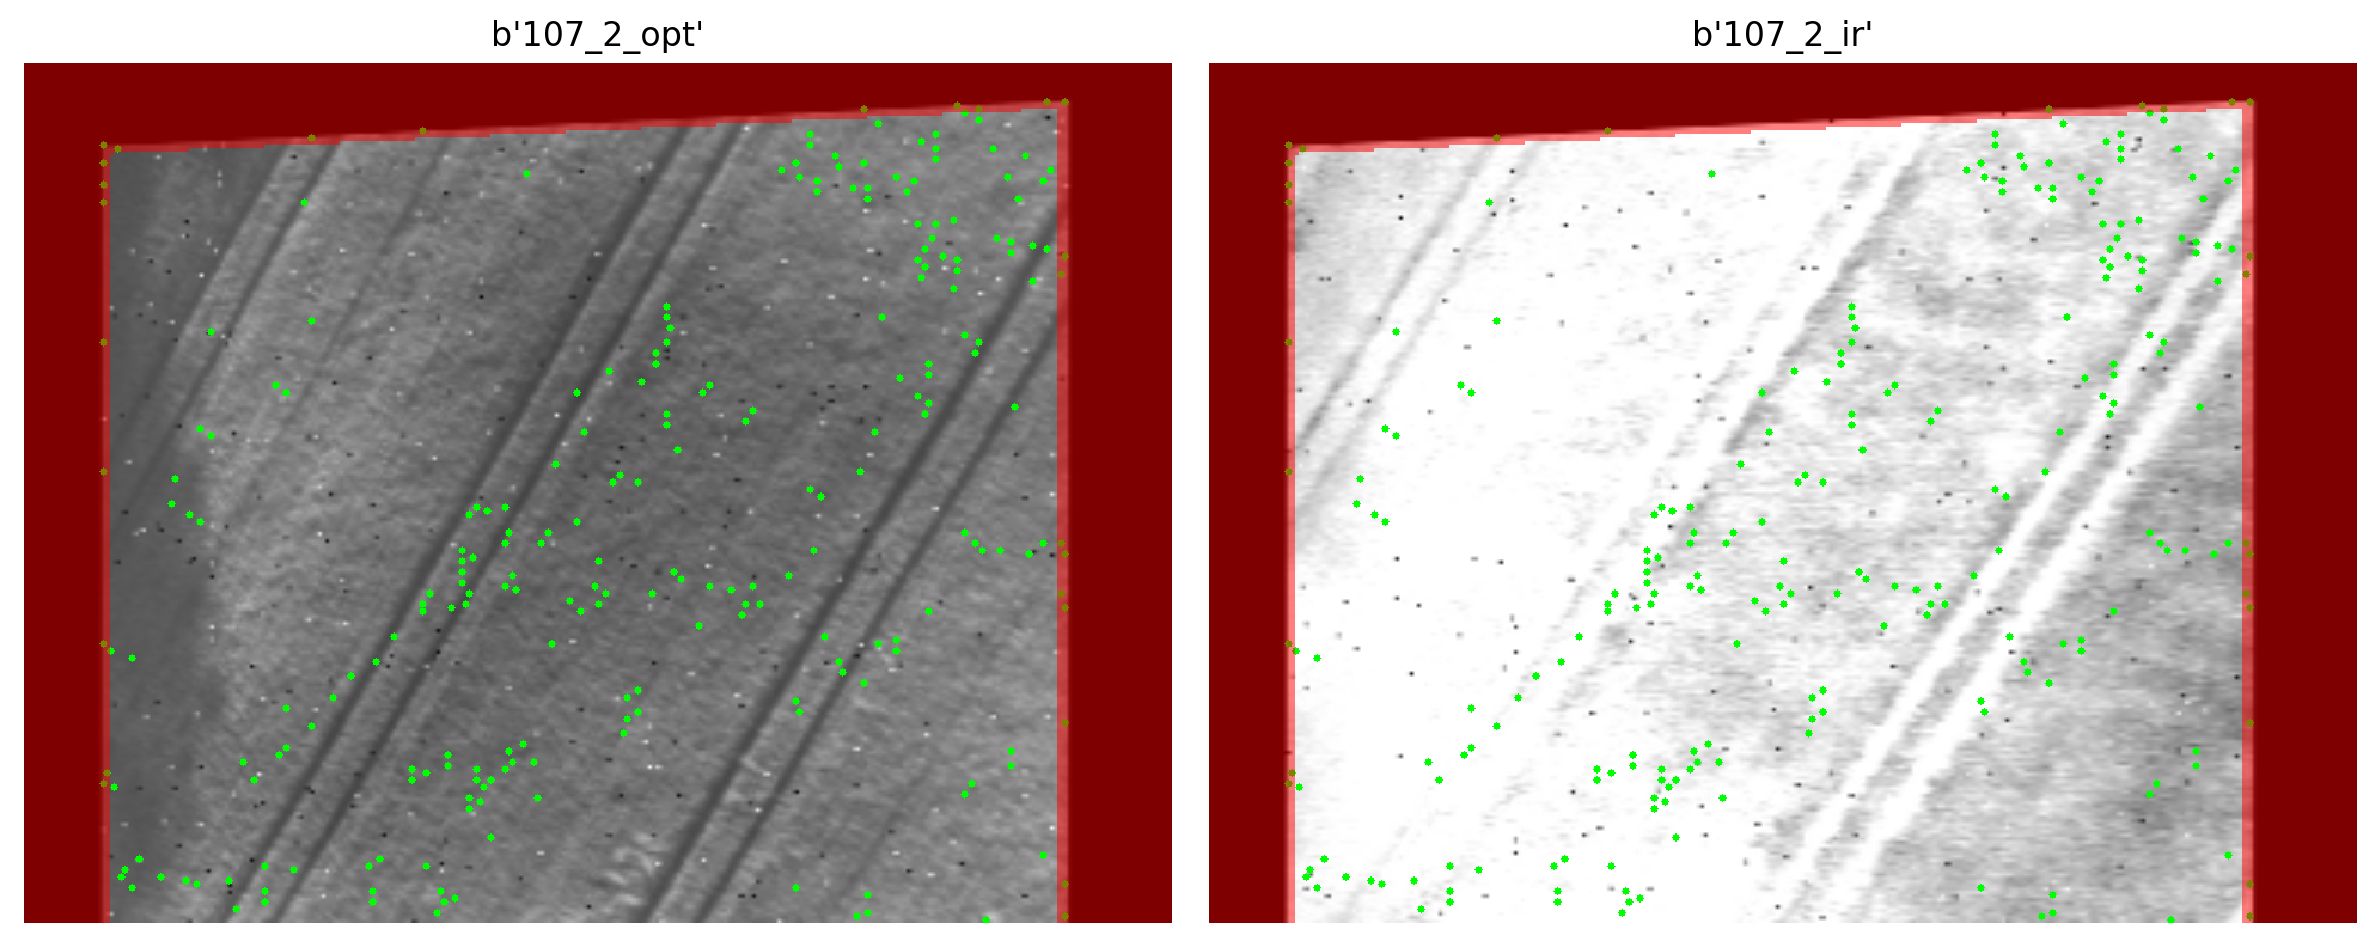

In [21]:
for i in range(30):
    images, names = [], []
    d = next(data)
    if not i % 10 == 0: continue
    images.append(display(d)/255.)
    names.append(d['name'])
    images.append(display_ir(d)/255.)
    names.append(d['name_ir'])
    plot_imgs(images, titles=names, dpi=200, cmap='gray', normalize=True)